In [178]:
import pandas as pd
from typing import Tuple, List, Dict
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [179]:
def print_df(dataframe: pd.DataFrame):
    print(tabulate(dataframe, headers='keys', tablefmt='psql'))

In [180]:
df = pd.read_csv('countries.csv')
print_df(dataframe = df)
df

+-----+-----------+------------+-------------+----------------------------------------------+
|     | country   |   latitude |   longitude | name                                         |
|-----+-----------+------------+-------------+----------------------------------------------|
|   0 | AD        |  42.5462   |    1.60155  | Andorra                                      |
|   1 | AE        |  23.4241   |   53.8478   | United Arab Emirates                         |
|   2 | AF        |  33.9391   |   67.71     | Afghanistan                                  |
|   3 | AG        |  17.0608   |  -61.7964   | Antigua and Barbuda                          |
|   4 | AI        |  18.2206   |  -63.0686   | Anguilla                                     |
|   5 | AL        |  41.1533   |   20.1683   | Albania                                      |
|   6 | AM        |  40.0691   |   45.0382   | Armenia                                      |
|   7 | AN        |  12.2261   |  -69.0601   | Netherlands A

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


## Preprocessing data

### Check missing values

In [181]:
df.isna().sum()

country      1
latitude     1
longitude    1
name         0
dtype: int64

### Continous object data

In [182]:
def numberic(dataframe: pd.DataFrame):
    df = dataframe.copy()
    for key in df.keys():
        if df[key].dtype == object:
            df[key] = LabelEncoder().fit_transform(df[key])

    return df

### Normalize data

In [183]:
def normalize(dataframe: pd.DataFrame):
    df = dataframe.copy()
    for key in df.keys():
        if df[key].dtype != object:
            min = df[key].min()
            max = df[key].max()
            df[key] = (df[key] - min)/(max-min)
            df[key] = df[key].round(decimals=4)
    return df

### Call continous data function

In [184]:
df = numberic(dataframe = df)

### Call normalize data function

In [185]:
# df = normalize(dataframe = df)

### Handle non-object missing data

In [186]:
def replace_Nan_data(dataframe: pd.DataFrame) :
    df = dataframe.copy()
    for key in df.keys():
        if df[key].isnull().sum() > 0:
            df[key].fillna(round(df[key].median()), inplace=True)
    return df

### Call handle non-object missing values

In [187]:
df = replace_Nan_data(dataframe = df)

### Heat map

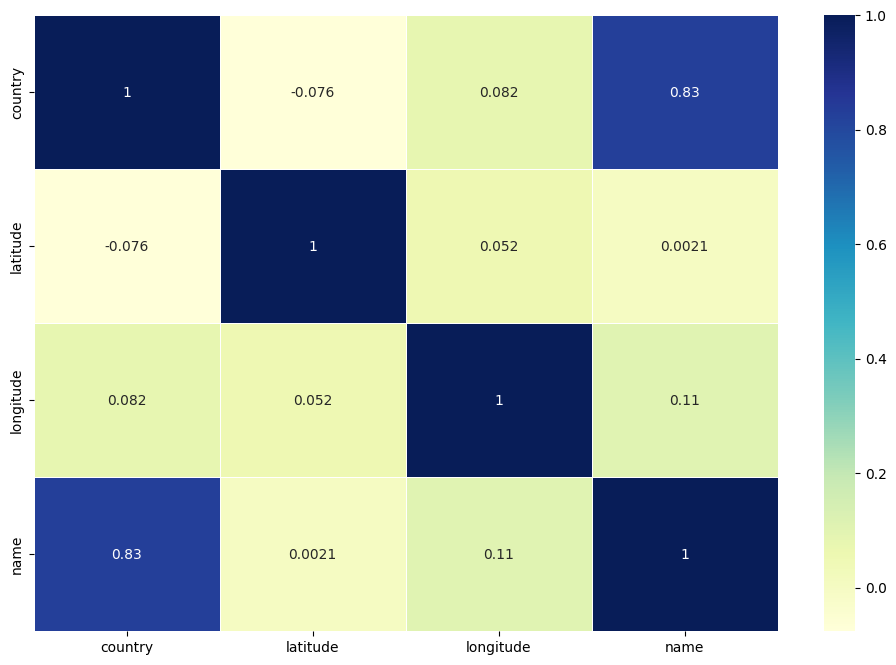

In [188]:
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu', linewidths = 0.5)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()


### 1. Dựa vào dữ liệu sau, hiển thị tọa độ của theo lat và lon của các nước lên một bản đồ

In [189]:
px.scatter(df, x = 'longitude', y = 'latitude', hover_name = 'country', color = 'country')

### 2. Phân cụm theo 3 thuật toán K-Means, DBSCAN, và DPC

In [190]:
df1 = df.copy()

In [191]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    X3 = X[label == 3, :]
    X4 = X[label == 4, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = 0.8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = 0.8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = 0.8)
    plt.plot(X3[:, 0], X3[:, 1], 'bx', markersize = 4, alpha = 0.8, c = 'orange')
    plt.plot(X4[:, 0], X4[:, 1], 'rs', markersize = 4, alpha = 0.8, c = 'violet')

    plt.axis('equal')
    plt.plot()
    plt.show()

In [192]:
X1 = df1.values
X1_cluster = X1[ : , 1 : 3]

### K-Means

C:\Users\PC\AppData\Local\Temp\ipykernel_22508\874191743.py:12: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.

C:\Users\PC\AppData\Local\Temp\ipykernel_22508\874191743.py:13: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "rs" (-> color='r'). The keyword argument will take precedence.



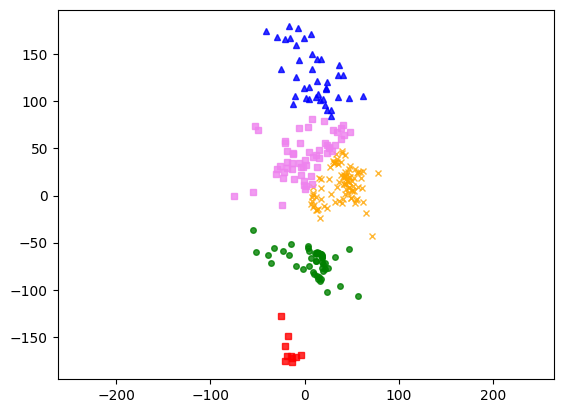

In [193]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, random_state = 0).fit(X1_cluster)
pred_label = kmeans.predict(X1_cluster)
pred_label
kmeans_display(X1_cluster, pred_label)

In [194]:
df

,country,latitude,longitude,name
0,0,42.546245,1.601554,4
1,1,23.424076,53.847818,231
2,2,33.939110,67.709953,0
3,3,17.060816,-61.796428,8
4,4,18.220554,-63.068615,6
...,...,...,...,...
240,239,15.552727,48.516388,242
241,240,-12.827500,45.166244,139
242,241,-30.559482,22.937506,200
243,242,-13.133897,27.849332,243


### DBSCAN

In [195]:
from sklearn.cluster import DBSCAN
df3 = df.copy()
df3 = numberic(df3)
df3 = replace_Nan_data(df3)
df3 = df3.values
a = df3[:,1:3]
db = DBSCAN(eps = 20, min_samples = 5)
db.fit(a)
y_pred = db.fit_predict(a)
y_pred

array([ 0,  0,  0,  1,  1,  0,  0,  1,  0, -1,  1,  2,  0,  0,  1,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  1,  0, -1,  0,  0,
        1, -1,  0,  0,  0,  0,  0,  0,  2,  1,  0,  0,  1,  1,  1,  0,  0,
        0,  0,  0,  0,  0,  1,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0, -1,  0,  0,  1,  0,
        0, -1,  1,  0,  0,  1,  0,  0, -1,  1,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  2,  0,  1,  0,
        0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  2,  0,  0,  1,
        1,  2,  0,  0,  0,  0,  1, -1,  1,  0,  0,  0,  1,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  1,  0,  0,  1,  0, -1,  0,  0,  0,  2,  0,  0,  0,  2,  0,  1,
        0,  0,  0,  0,  0

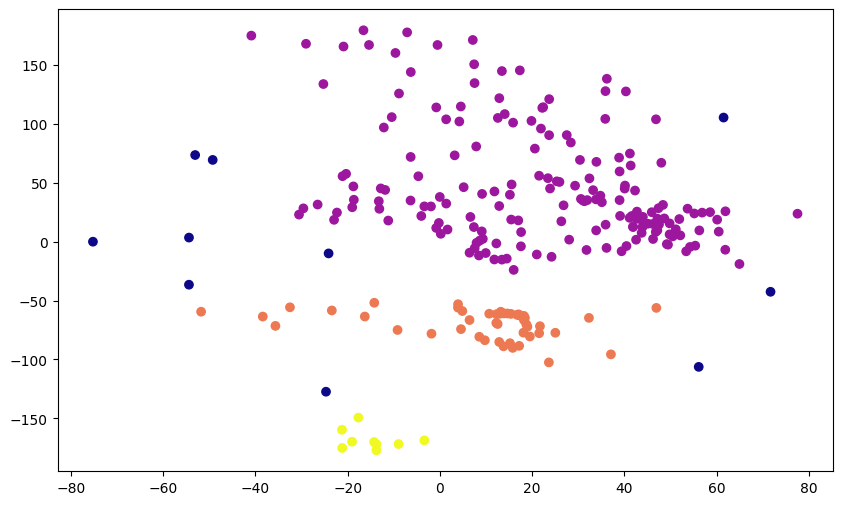

In [196]:
plt.figure(figsize=(10,6))
plt.scatter(a[:,0], a[:,1], c = y_pred, cmap = 'plasma')


### DPC


In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from scipy.spatial.distance import pdist,squareform
from collections import OrderedDict
from itertools import combinations,product
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.semi_supervised import LabelPropagation
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import mean_squared_error,accuracy_score,mean_absolute_error,f1_score

In [198]:
def getDistCut(distList,distPercent):
    return max(distList) * distPercent / 100

In [199]:
def getRho(n,distMatrix,distCut):
    rho = np.zeros(n,dtype=float)
    for i in range(n-1):
        for j in range(i+1,n):
            rho[i] = rho[i] + np.exp(-(distMatrix[i, j] / distCut) ** 2)
            rho[j] = rho[j] + np.exp(-(distMatrix[i, j] / distCut) ** 2)
    return rho

In [200]:
def DPCA(n,distMatrix,rho,blockNum):
    rhoOrdIndex = np.flipud(np.argsort(rho))
    delta = np.zeros(n,dtype=float)
    leader = np.ones(n,dtype=int) * int(-1)
    maxdist = 0
    for ele in range(n):
        if distMatrix[rhoOrdIndex[0],ele] > maxdist:
            maxdist = distMatrix[rhoOrdIndex[0],ele]
    delta[rhoOrdIndex[0]] = maxdist
    for i in range(1,n):
        mindist = np.inf
        minindex = -1
        for j in range(i):
            if distMatrix[rhoOrdIndex[i],rhoOrdIndex[j]] < mindist:
                mindist = distMatrix[rhoOrdIndex[i],rhoOrdIndex[j]]
                minindex = rhoOrdIndex[j]
        delta[rhoOrdIndex[i]] = mindist
        leader[rhoOrdIndex[i]] = minindex
    gamma = delta * rho
    gammaOrdIdx = np.flipud(np.argsort(gamma))
    clusterIdx = np.ones(n,dtype=int) * (-1)
    for k in range(blockNum):
        clusterIdx[gammaOrdIdx[k]] = k
    for i in range(n):
        if clusterIdx[rhoOrdIndex[i]] == -1:
            clusterIdx[rhoOrdIndex[i]] = clusterIdx[leader[rhoOrdIndex[i]]]
    clusterSet = OrderedDict()
    for k in range(blockNum):
        clusterSet[k] = []
    for i in range(n):
        clusterSet[clusterIdx[i]].append(i)
    return clusterSet


In [201]:
def getDistanceMatrix(datas):
    N,D = np.shape(datas)
    dists = np.zeros([N,N])
    
    for i in range(N):
        for j in range(N):
            vi = datas[i,:]
            vj = datas[j,:]
            dists[i,j]= np.sqrt(np.dot((vi-vj),(vi-vj)))
    return dists

In [202]:
def select_dc(dists):    
    N = np.shape(dists)[0]
    tt = np.reshape(dists,N*N)
    percent = 2.0
    position = int(N * (N - 1) * percent / 100)
    dc = np.sort(tt)[position  + N]
    
    return dc

In [203]:
def get_density(dists,dc,method=None):
    N = np.shape(dists)[0]
    rho = np.zeros(N)
    
    for i in range(N):
        if method == None:
            rho[i]  = np.where(dists[i,:]<dc)[0].shape[0]-1
        else:
            rho[i] = np.sum(np.exp(-(dists[i,:]/dc)**2))-1
    return rho

In [204]:
def get_deltas(dists,rho):
    N = np.shape(dists)[0]
    deltas = np.zeros(N)
    nearest_neiber = np.zeros(N)

    index_rho = np.argsort(-rho)
    for i,index in enumerate(index_rho):

        if i==0:
            continue
  
        index_higher_rho = index_rho[:i]
 
        deltas[index] = np.min(dists[index,index_higher_rho])
        
        index_nn = np.argmin(dists[index,index_higher_rho])
        nearest_neiber[index] = index_higher_rho[index_nn].astype(int)
    
    deltas[index_rho[0]] = np.max(deltas)   
    return deltas,nearest_neiber

In [205]:
def find_centers_auto(rho,deltas):
    rho_threshold = (np.min(rho) + np.max(rho))/ 2
    delta_threshold  = (np.min(deltas) + np.max(deltas))/ 2
    N = np.shape(rho)[0]
    
    centers = []
    for i in range(N):
        if rho[i]>=rho_threshold and deltas[i]>delta_threshold:
            centers.append(i)
    return np.array(centers)

In [206]:
def find_centers_K(rho,deltas,K):
    rho_delta = rho*deltas
    centers = np.argsort(-rho_delta)
    return centers[:K]

In [207]:
def cluster_PD(rho,centers,nearest_neiber):
    K = np.shape(centers)[0]
    if K == 0:
        print("can not find centers")
        return
    
    N = np.shape(rho)[0]
    labs = -1*np.ones(N).astype(int)
    

    for i, center in enumerate(centers):
        labs[center] = i
   

    index_rho = np.argsort(-rho)
    for i, index in enumerate(index_rho):

        if labs[index] == -1:
            labs[index] = labs[int(nearest_neiber[index])]
    return labs

In [208]:
def draw_decision(rho,deltas,name="1.jpg"):       
    plt.cla()
    for i in range(np.shape(df)[0]):
        plt.scatter(rho[i],deltas[i],s=16.,color=(0,0,0))
        plt.annotate(str(i), xy = (rho[i], deltas[i]),xytext = (rho[i], deltas[i]))
        plt.xlabel("rho")
        plt.ylabel("deltas")
    plt.savefig(name)
    plt.show()

In [209]:
def draw_cluster(datas,labs,centers, dic_colors, name="1.jpg"):     
    plt.cla()
    K = np.shape(centers)[0]
    
    for k in range(K):
        sub_index = np.where(labs == k)
        sub_datas = datas[sub_index]
        plt.scatter(sub_datas[:,0],sub_datas[:,1],s=16.,color=dic_colors[k])
        plt.scatter(datas[centers[k],0],datas[centers[k],1],color="k",marker="+",s = 200.)
    plt.savefig(name)
    plt.show()

In [210]:
tmp = pd.DataFrame(df)
tmp = tmp.to_csv('temp.csv')

number 39.78327178955078


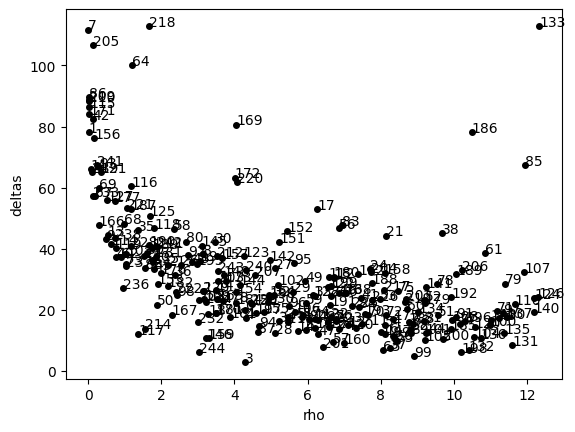

cluster-centers [133 186  85]


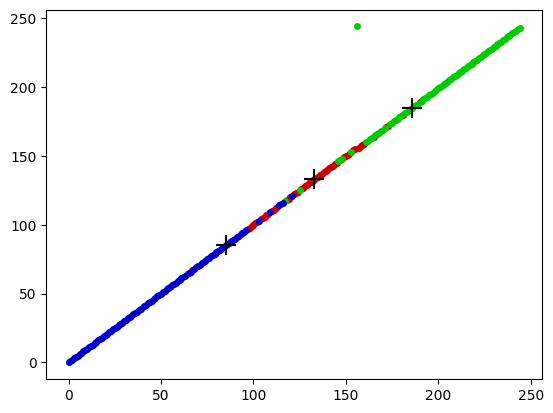

In [211]:
dic_colors = {0:(.8,0,0),1:(0,.8,0),
                  2:(0,0,.8),3:(.8,.8,0),
                  4:(.8,0,.8),5:(0,.8,.8),
                  7:(0,0,0)}
file_name = "DPCA"    

with open(r'temp.csv', 'r') as fc:   
        reader = csv.reader(fc)
        lines1 = []
        for line in reader:
            lines1.append(line)
lines = lines1[1:]
datas = np.array(lines).astype(np.float32)
dists = getDistanceMatrix(datas)
dc = select_dc(dists)
print("number",dc)
rho = get_density(dists,dc,method="Gaussion")# we can use other distance such as 'manhattan_distance'
deltas, nearest_neiber= get_deltas(dists,rho)
draw_decision(rho,deltas,name=file_name+"_decision.jpg")
centers = find_centers_K(rho,deltas,3)
print("cluster-centers",centers)
labs = cluster_PD(rho,centers,nearest_neiber)
draw_cluster(datas,labs,centers, dic_colors, name=file_name+"_cluster-result.jpg") 

# So sánh DBSCAN và KMeans

# KMeans
### 1. Các cụm được hình thành có dạng hình cầu hoặc lồi ít nhiều và phải có cùng kích thước đặc trưng.
### 2. Phân cụm K-means nhạy cảm với số lượng cụm được chỉ định
### 3. K-means Phân cụm hiệu quả hơn đối với các tập dữ liệu lớn
### 4. K-mean Clustering không hoạt động tốt với các giá trị ngoại lệ và bộ dữ liệu nhiễu.
### 5. Trong lĩnh vực phát hiện bất thường, thuật toán này gây ra vấn đề vì các điểm bất thường sẽ được gán cho cùng một cụm với các điểm dữ liệu “bình thường”
### 6. Nó yêu cầu một tham số: Số cụm (K)
### 7. Mật độ khác nhau của các điểm dữ liệu không ảnh hưởng đến thuật toán phân cụm K-means.


# DBSCAN
### 1. Các cụm được hình thành có hình dạng tùy ý và có thể không có cùng kích thước tính năng.
### 2. Số lượng cụm không cần phải được chỉ định.
### 3. DBSCan Clustering không thể xử lý hiệu quả các bộ dữ liệu chiều cao.
### 4. Phân cụm DBScan xử lý hiệu quả các giá trị ngoại lai và bộ dữ liệu nhiễu.
### 5. Mặt khác, thuật toán DBScan định vị các vùng có mật độ cao được phân tách với nhau bằng các vùng có mật độ thấp.
### 6. Nó yêu cầu hai tham số: Bán kính (R) và Điểm tối thiểu (M)
### R xác định bán kính đã chọn sao cho nếu nó bao gồm đủ điểm bên trong nó, thì đó là một khu vực dày đặc.
### M xác định số điểm dữ liệu tối thiểu cần có trong một vùng lân cận để được xác định là một cụm.
### 7. Phân cụm DBScan không hoạt động tốt cho các bộ dữ liệu thưa thớt hoặc cho các điểm dữ liệu có mật độ khác nhau.
